In [0]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


In [0]:
# dimensions of images.
img_width, img_height = 150, 150

In [0]:
#My google drive has been mounted to read data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_data_dir = '/content/drive/My Drive/data1/train'
validation_data_dir = '/content/drive/My Drive/data/validation'
nb_train_samples = 1664
nb_validation_samples = 684
epochs = 50
batch_size = 16

In [0]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [0]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This class helps in bringing versitality to the data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [0]:
# configuration used for testing:

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [0]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=42)

Found 975 images belonging to 2 classes.


In [0]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=42)

Found 681 images belonging to 2 classes.


In [0]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)



Epoch 1/50
104/104 [==============================] - 71s 679ms/step - loss: 0.2272 - acc: 0.9194 - val_loss: 0.1140 - val_acc: 0.9598
Epoch 2/50
104/104 [==============================] - 68s 657ms/step - loss: 0.2180 - acc: 0.9260 - val_loss: 0.1122 - val_acc: 0.9594
Epoch 3/50
104/104 [==============================] - 68s 653ms/step - loss: 0.2479 - acc: 0.9134 - val_loss: 0.0774 - val_acc: 0.9759
Epoch 4/50
104/104 [==============================] - 69s 662ms/step - loss: 0.2284 - acc: 0.9259 - val_loss: 0.1107 - val_acc: 0.9579
Epoch 5/50
104/104 [==============================] - 69s 660ms/step - loss: 0.2323 - acc: 0.9216 - val_loss: 0.1013 - val_acc: 0.9579
Epoch 6/50
104/104 [==============================] - 68s 654ms/step - loss: 0.2264 - acc: 0.9237 - val_loss: 0.0736 - val_acc: 0.9759
Epoch 7/50
104/104 [==============================] - 67s 643ms/step - loss: 0.2586 - acc: 0.9157 - val_loss: 0.0758 - val_acc: 0.9744
Epoch 8/50
104/104 [==============================] - 7

Populating the interactive namespace from numpy and matplotlib


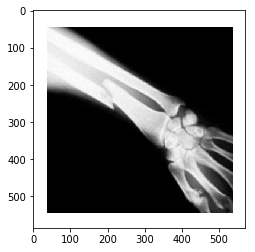

This is a broken bone.


In [0]:
import numpy as np
from PIL import Image

#Loading the image to be predicted:
from keras.preprocessing import image
test_image1 = image.load_img("/content/drive/My Drive/data/prediction/pic1.jpg",target_size=(150, 150) )
# Adding the channel
test_image1 = image.img_to_array(test_image1)
# Adding the batch size as predict method expects
test_image1 = np.expand_dims(test_image1, axis=0)
# Predicting the test image
result= model.predict(test_image1)

#For displaying the image:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread("/content/drive/My Drive/data/prediction/pic1.jpg")
imgplot = plt.imshow(img)
plt.show()
                 
#Printing the result:
rounded = [int(np.round(x)) for x in result]
if rounded == [0]:
  print("This is a broken bone.")
else:
  print("This is an intact bone.")